In [5]:
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use("/Users/tjwilli/jupyter.mplstyle")

In [35]:
def get_motion(v0=1,theta=90,dt=0.01,tstop=10):
    t = np.arange(0,tstop,dt)
    vx,vy,x,y = ( np.zeros_like(t) for i in range(4) )
    theta = np.deg2rad(theta)
    vx[0] = v0 * np.cos(theta)
    vy[0] = v0 * np.sin(theta)
    y[0]  = 1
    
    for i in range(1,t.size):
        acc = 1 / ( x[i-1]**2 + y[i-1]**2 )**1.5
        accX = -acc * x[i-1]
        accY = -acc * y[i-1]
        vx[i] = vx[i-1] + accX * dt
        vy[i] = vy[i-1] + accY * dt
        x[i]  = x[i-1] + vx[i-1] * dt
        y[i]  = y[i-1] + vy[i-1] * dt
        
        if np.hypot(x[i],y[i]) < 1:
            break
      
    mask = np.hypot(x,y) >=1
    res = {
        't':t[mask],
        'vx':vx[mask],
        'vy':vy[mask],
        'x':x[mask],
        'y':y[mask]
    }
    return res

In [68]:
res = get_motion(v0=np.sqrt(2)*0.9999,theta=45,dt=.01,tstop=5000)

Text(0, 0.5, 'y')

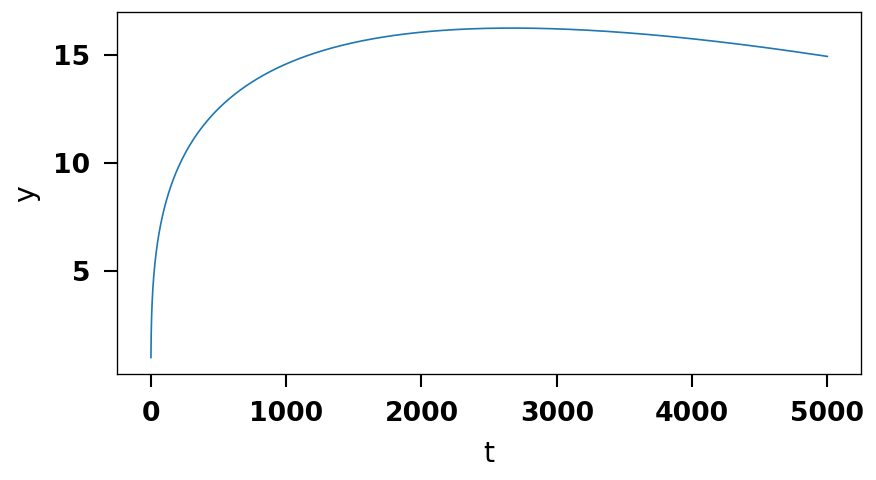

In [69]:
plt.plot( res['t'],res['y'])
plt.xlabel('t')
plt.ylabel('y')